In [1]:
import matplotlib.pyplot as plt
import numpy as np

Let's compare %armor pen vs flat armor pen

In [2]:
Armor = np.linspace(50,200,40)
normalized_damage = 1/(1+Armor/100)
damage_with_30percent_arpen = 1/(1+Armor*0.7/100)
damage_with_10flat_arpen = 1/(1+(Armor-10)/100)
damage_with_20flat_arpen = 1/(1+(Armor-20)/100)
damage_with_30flat_arpen = 1/(1+(Armor-30)/100)
damage_with_50flat_arpen = 1/(1+(Armor-50)/100)

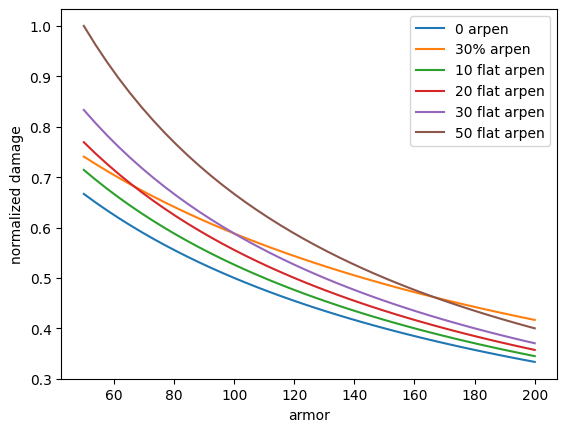

In [3]:
plt.plot(Armor, normalized_damage, label = "0 arpen")
plt.plot(Armor, damage_with_30percent_arpen, label = "30% arpen")
plt.plot(Armor, damage_with_10flat_arpen, label = "10 flat arpen")
plt.plot(Armor, damage_with_20flat_arpen, label = "20 flat arpen")
plt.plot(Armor, damage_with_30flat_arpen, label = "30 flat arpen")
plt.plot(Armor, damage_with_50flat_arpen, label = "50 flat arpen")

plt.ylabel("normalized damage")
plt.xlabel("armor")
plt.legend(loc="upper right")
plt.show()

30% armor pen is better than 10 flat armor pen if the target has more than 34 armor\
30% armor pen is better than 20 flat armor pen if the target has more than 67 armor\
30% armor pen is better than 50 flat armor pen if the target has more than 167 armor

Now let's compare last whisper vs (serrated dirk + longsword), using zed level 11 with no other items

In [5]:
import os
os.chdir("..")
from tootanky.champions import Zed
from tootanky.item import ALL_ITEM_CLASSES
from tootanky.item import SerratedDirk, LastWhisper, YoumuuGhostblade, SeryldaGrudge

In [6]:
zed_serrated_dirk = Zed(level = 11)
print("Zed base ad:", zed_serrated_dirk.orig_base_stats.attack_damage)
zed_serrated_dirk.equip_item(ALL_ITEM_CLASSES["Serrated Dirk"]())
print("Serrated Dirk bonus ad:", zed_serrated_dirk.orig_bonus_stats.attack_damage)
total_ad_sd = zed_serrated_dirk.orig_bonus_stats.attack_damage + zed_serrated_dirk.orig_base_stats.attack_damage
print("Zed with Serrated Dirk total ad:", total_ad_sd)


zed_last_whisper = Zed(level = 11)
zed_last_whisper.equip_item(ALL_ITEM_CLASSES["Last Whisper"]())
print("Last Whisper ad:", zed_last_whisper.orig_bonus_stats.attack_damage)
total_ad_lw = zed_last_whisper.orig_base_stats.attack_damage + zed_last_whisper.orig_bonus_stats.attack_damage
print("Zed % armor pen :", zed_last_whisper.orig_bonus_stats.armor_pen_percent)
print("Zed with Last Whisper total ad:", total_ad_lw)

zed_serrated_dirk_ls = Zed(level = 11)
zed_serrated_dirk_ls.equip_item(ALL_ITEM_CLASSES["Serrated Dirk"]())
zed_serrated_dirk_ls.equip_item(ALL_ITEM_CLASSES["Long Sword"]())
total_ad_sd_ls = zed_serrated_dirk_ls.orig_base_stats.attack_damage + zed_serrated_dirk_ls.orig_bonus_stats.attack_damage
print("Zed with Serrated Dirk and Longsword total ad:", total_ad_sd_ls)

Zed base ad: 92.83500000000001
Serrated Dirk bonus ad: 30
Zed with Serrated Dirk total ad: 122.83500000000001
Last Whisper ad: 20
Zed % armor pen : 0.18
Zed with Last Whisper total ad: 112.83500000000001
Zed with Serrated Dirk and Longsword total ad: 132.835


Calculate flat armor pen from lethality

In [7]:
def lethality_to_flat_arpen(level: int, letha : int):
    return letha * (0.6 + 0.4 * level/18)

flat_ar_pen = lethality_to_flat_arpen(zed_serrated_dirk.level, zed_serrated_dirk.orig_bonus_stats.lethality)
print(flat_ar_pen)

8.444444444444445


In [8]:
Armor = np.linspace(40,500,40)
damage_no_item = zed_serrated_dirk.orig_base_stats.attack_damage / (1 + Armor/100)
damage_sd = total_ad_sd / (1+(Armor - flat_ar_pen)/100)
damage_lw = total_ad_lw / (1+(Armor*(1-zed_last_whisper.orig_bonus_stats.armor_pen_percent))/100)
damage_sd_ls = total_ad_sd_ls / (1+(Armor - flat_ar_pen)/100)

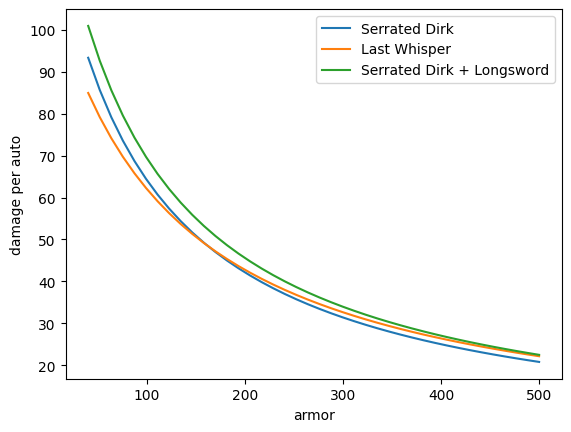

In [9]:
#plt.plot(Armor, damage_no_item, label = "0 item")
plt.plot(Armor, damage_sd, label = "Serrated Dirk")
plt.plot(Armor, damage_lw, label = "Last Whisper")
plt.plot(Armor, damage_sd_ls, label = "Serrated Dirk + Longsword")

plt.ylabel("damage per auto")
plt.xlabel("armor")
plt.legend(loc="upper right")
plt.show()


If the target has more than 160 armor, last whisper is more efficient than serrated dirk\
Serrated Dirk + Longsword is almost always better than Last Whisper

Let's compare Youmuu's Ghostblade with Serylda's Grudge

In [10]:
zed_youmuu = Zed(level = 11)
print("Zed base ad:", zed_youmuu.orig_base_stats.attack_damage)
zed_youmuu.equip_item(ALL_ITEM_CLASSES["Youmuu's Ghostblade"]())
print("Youmuu's Ghostblade bonus ad:", zed_youmuu.orig_bonus_stats.attack_damage)
print("Youmuu's Ghostblade lethality:", zed_youmuu.orig_bonus_stats.lethality)
total_ad_youmuu = zed_youmuu.orig_bonus_stats.attack_damage + zed_youmuu.orig_base_stats.attack_damage
print("Zed with Youmuu's Ghostblade total ad:", total_ad_youmuu)

zed_serylda = Zed(level = 11)
zed_serylda.equip_item(ALL_ITEM_CLASSES["Serylda's Grudge"]())
print("Serylda's Grudge bonus ad:", zed_serylda.orig_bonus_stats.attack_damage)
print("Serylda's Grudge % armor pen:", zed_serylda.orig_bonus_stats.armor_pen_percent)
total_ad_serylda = zed_serylda.orig_bonus_stats.attack_damage + zed_serylda.orig_base_stats.attack_damage
print("Zed with Serylda's Grudge total ad:", total_ad_serylda)

Zed base ad: 92.83500000000001
Youmuu's Ghostblade bonus ad: 55
Youmuu's Ghostblade lethality: 18
Zed with Youmuu's Ghostblade total ad: 147.835
Serylda's Grudge bonus ad: 45
Serylda's Grudge % armor pen: 0.3
Zed with Serylda's Grudge total ad: 137.835


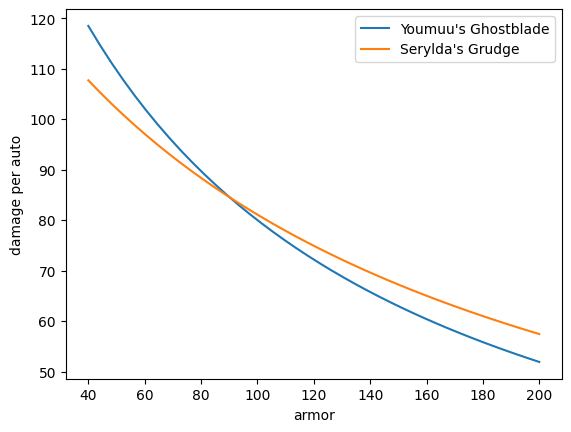

In [11]:
flat_ar_pen = lethality_to_flat_arpen(zed_youmuu.level, zed_youmuu.orig_bonus_stats.lethality)

Armor = np.linspace(40,200,40)
damage_youmuu = total_ad_youmuu / (1+(Armor - flat_ar_pen)/100)
damage_serylda = total_ad_serylda / (1+(Armor*(1-zed_serylda.orig_bonus_stats.armor_pen_percent))/100)

#plt.plot(Armor, damage_no_item, label = "0 item")
plt.plot(Armor, damage_youmuu, label = "Youmuu's Ghostblade")
plt.plot(Armor, damage_serylda, label = "Serylda's Grudge")

plt.ylabel("damage per auto")
plt.xlabel("armor")
plt.legend(loc="upper right")
plt.show()

Serylda's Grudge is better than Youmuu's Ghostblade from 90 armor onwards